In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.8 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/9.8 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.8 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.8 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.8 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.8 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.8 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/9.8 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.8 MB 2.2 MB/s eta 0:00:05
   ---- ----------------------------------- 1.1/9.8 MB 2.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.8 MB 2.2 MB/s eta 0:00:04
   ---- -----------

### Scatter plot

In [3]:
iris = px.data.iris()
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

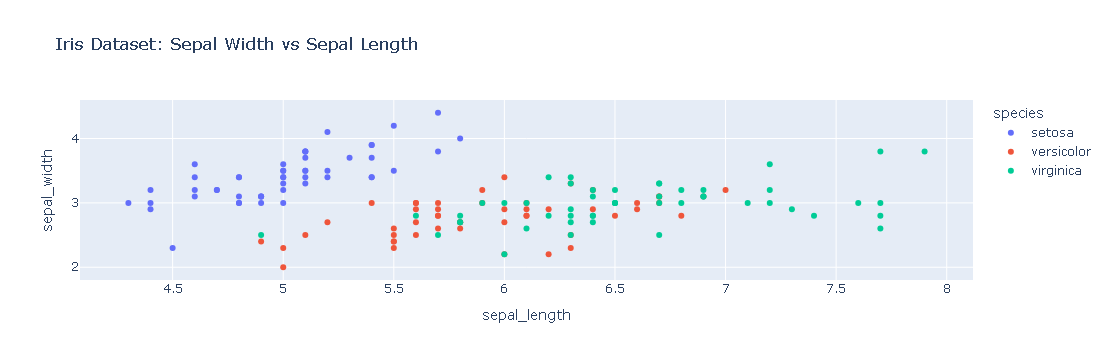

In [4]:
fig = px.scatter(
    iris, 
    x='sepal_length', 
    y='sepal_width', 
    color='species', 
    title='Iris Dataset: Sepal Width vs Sepal Length'
)
fig.show()

Пузырьковая диаграмма

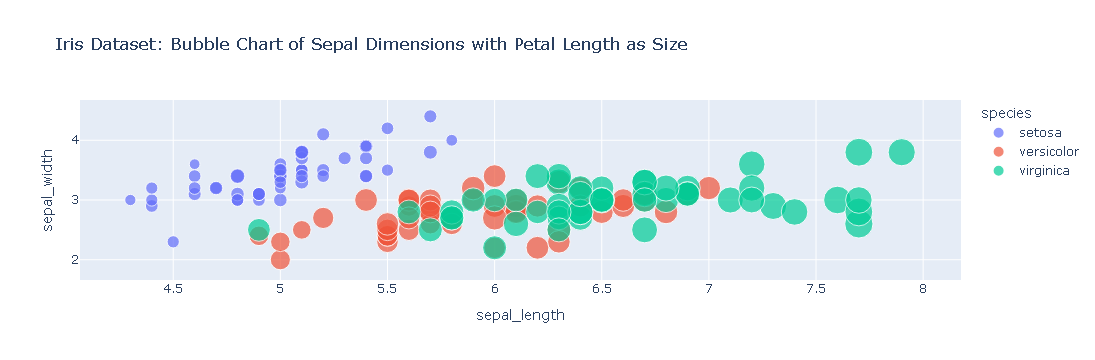

In [5]:
fig = px.scatter(
    iris, 
    x='sepal_length', 
    y='sepal_width', 
    color='species',
    size='petal_length', 
    title='Iris Dataset: Bubble Chart of Sepal Dimensions with Petal Length as Size'
)
fig.show()

Линия тренда

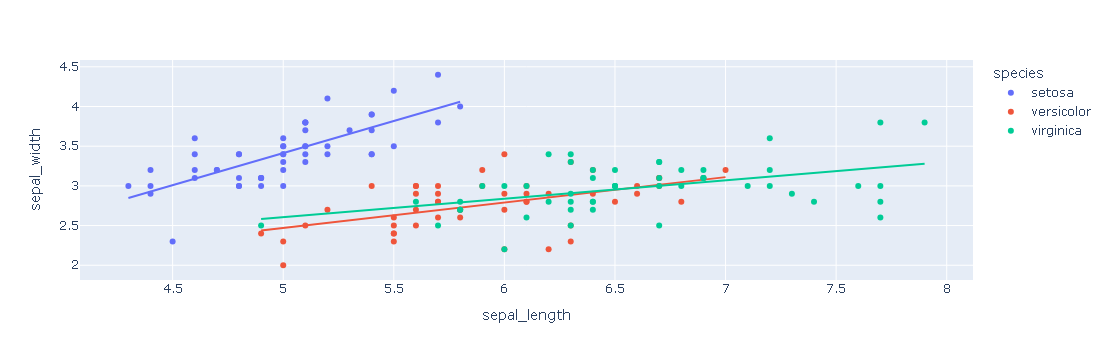

In [6]:
fig = px.scatter(
    iris, 
    x='sepal_length', 
    y='sepal_width', 
    color='species',
    trendline='ols'
)
fig.show()

### Практическое задание 0
1. Подгрузите данные по ценам акций apple и microsoft за 2023-й год
2. В обоих датасетах оставьте только цену закрытия
3. В обоих датасетах создайте 2 новых колонки - цена за вчерашний день (.shift(periods=1))
4. Сджойните датасеты. Проверьте датасеты на нулевые значения
5. Отфильтруйте датасеты так, чтобы нулевых значений не осталось
6. Постройте scatter plot между вчерашней ценой акции майкрософт и сегодняшней ценой акции apple
7. Обучите модель линейной регрессии. Предиктор - майкрософт вчера, цель - apple сегодня
8. Сделайте новую колонку - предсказание модели
9. Выведите коэффициенты модели
10. Постройте новую модель - теперь в качестве предиктора используйте вчерашнюю цену акции apple
11. Оцените точность модели
12. Визуализируйте модель с помощью scatter plot

In [7]:
import yfinance as yf
tickers = 'AAPL'
df_apple = yf.download(tickers, start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [8]:
tickers = 'MSFT'
df_microsoft = yf.download(tickers, start='2023-01-01', end='2023-12-31')
df_microsoft.head()

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  243.080002  245.750000  237.399994  239.580002  236.609222   
2023-01-04  232.279999  232.869995  225.960007  229.100006  226.259186   
2023-01-05  227.199997  227.550003  221.759995  222.309998  219.553360   
2023-01-06  223.000000  225.759995  219.350006  224.929993  222.140884   
2023-01-09  226.449997  231.240005  226.410004  227.119995  224.303726   

              Volume  
Date                  
2023-01-03  25740000  
2023-01-04  50623400  
2023-01-05  39585600  
2023-01-06  43613600  
2023-01-09  27369800

In [10]:
df_apple = df_apple[['Close']]
df_microsoft = df_microsoft[['Close']]

In [11]:
df_microsoft['Close_yesterday'] = df_microsoft['Close'].shift(periods=1)
df_microsoft.head()

Close  Close_yesterday
Date                                   
2023-01-03  239.580002              NaN
2023-01-04  229.100006       239.580002
2023-01-05  222.309998       229.100006
2023-01-06  224.929993       222.309998
2023-01-09  227.119995       224.929993

In [12]:
df_apple['Close_yesterday_apple'] = df_apple['Close'].shift(periods=1)
df_apple.head()

Close  Close_yesterday_apple
Date                                         
2023-01-03  125.070000                    NaN
2023-01-04  126.360001             125.070000
2023-01-05  125.019997             126.360001
2023-01-06  129.619995             125.019997
2023-01-09  130.149994             129.619995

In [13]:
df_microsoft['Close_yesterday_microsoft'] = df_microsoft['Close'].shift(periods=1)
df_microsoft.head()

Close  Close_yesterday  Close_yesterday_microsoft
Date                                                              
2023-01-03  239.580002              NaN                        NaN
2023-01-04  229.100006       239.580002                 239.580002
2023-01-05  222.309998       229.100006                 229.100006
2023-01-06  224.929993       222.309998                 222.309998
2023-01-09  227.119995       224.929993                 224.929993

In [14]:
df_new = pd.merge(df_apple, df_microsoft[['Close_yesterday_microsoft']], left_index = True, right_index = True )

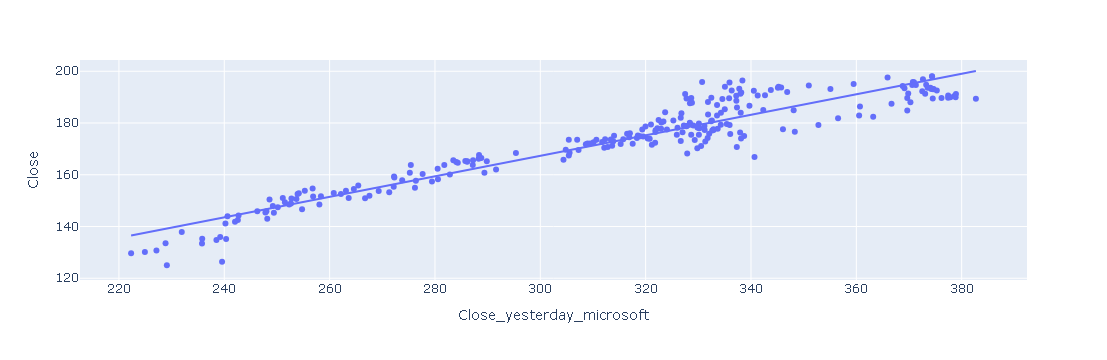

In [15]:
fig = px.scatter(
    df_new,
    x='Close_yesterday_microsoft',
    y='Close',
    trendline='ols'
)
fig.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# mse = mean_squared_error(
#     y_test, 
#     y_pred
# )

# model.coef_
# model.intercept_

In [18]:
df_new.head()

Close  Close_yesterday_apple  Close_yesterday_microsoft
Date                                                                    
2023-01-03  125.070000                    NaN                        NaN
2023-01-04  126.360001             125.070000                 239.580002
2023-01-05  125.019997             126.360001                 229.100006
2023-01-06  129.619995             125.019997                 222.309998
2023-01-09  130.149994             129.619995                 224.929993

In [ ]:
df_new = 
fig = px.scatter(
    df_new,
    x='Close_yesterday_microsoft',
    y='Close',
    trendline='ols'
)
fig.show()


# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

#model = LinearRegression()

#mse = mean_squared_error(
    #y_test, 
    #y_pred
#)

#model.coef_
#model.intercept_


model = LinearRegression()
model.fit(
    df_new[['Close_yesterday_microsoft']],
    df_new['Close']
)


In [ ]:
df_new['Close_pred1'] = model.predict(df_new[['Close_yesterday_microsoft']])

In [ ]:
mse = mean_squared_error(
    df_new['Close'], 
    df_new['Close_pred1']
)
mse
fig = px.scatter(
    df_new,
    x='Close_yesterday_apple',
    y='Close',
    trendline='ols'
)
fig.show()

### Box plot

In [26]:
tips = px.data.tips()
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

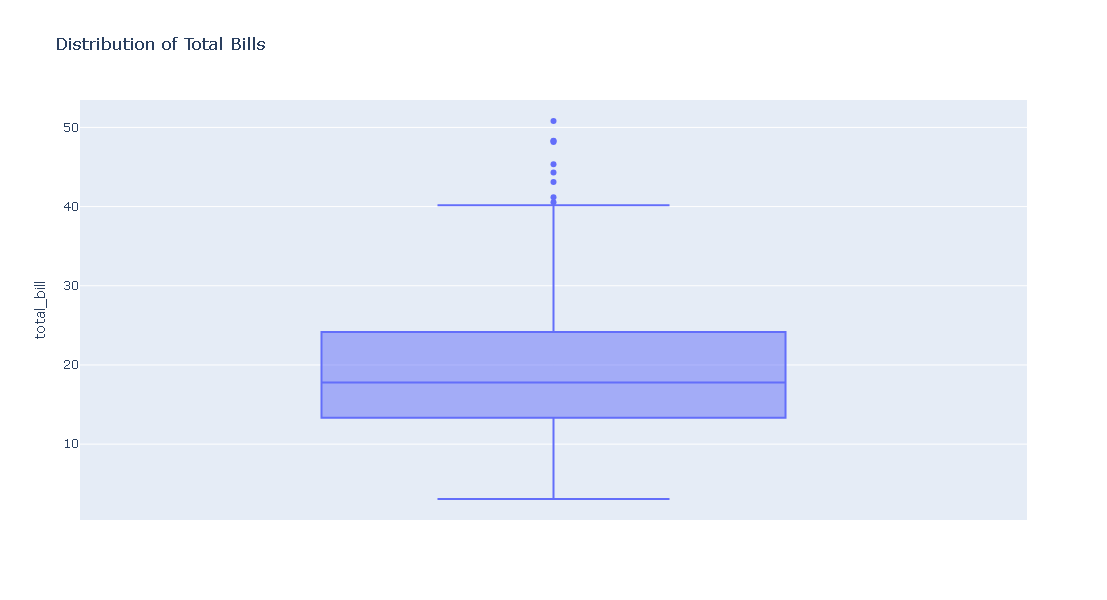

In [31]:
fig = px.box(tips, y='total_bill', title='Distribution of Total Bills')

fig.update_layout(width=600, height=600)

fig.show()

Группировка по категориальной переменной

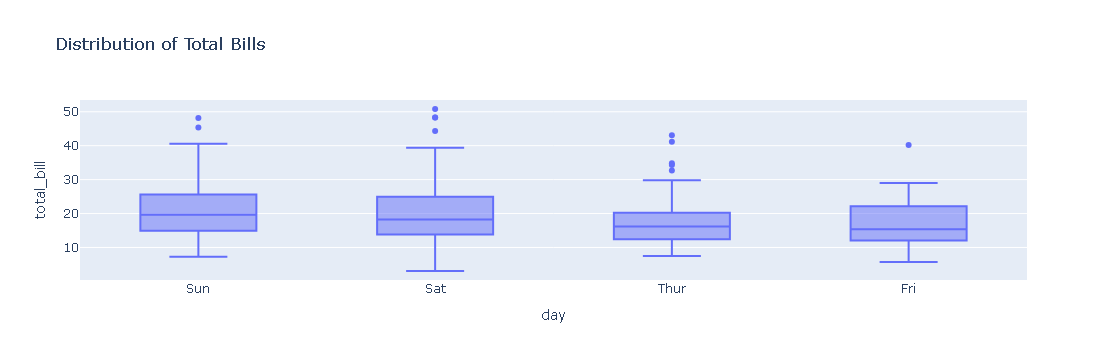

In [32]:
fig = px.box(
    tips, 
    x='day', 
    y='total_bill', 
    title='Distribution of Total Bills'
)
fig.show()

Дополнительные параметры

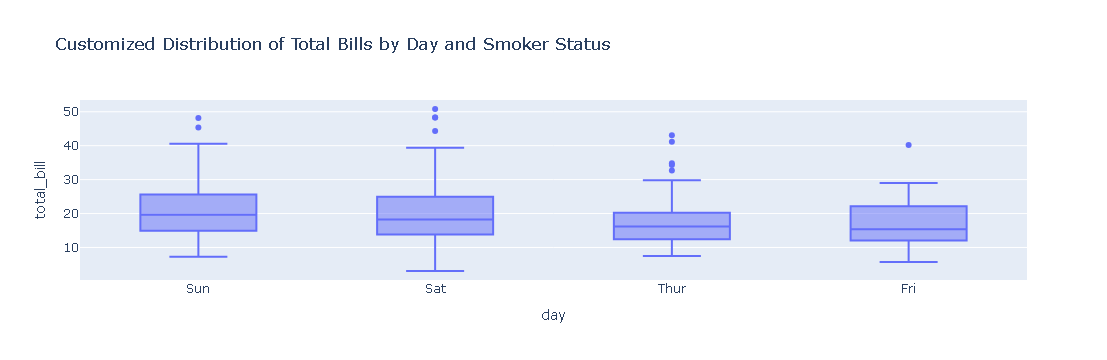

In [39]:
fig = px.box(
    tips, 
    x='day', 
    y='total_bill', 
#    color='smoker',
#    notched=True,  # Добавляет засечки для обозначения доверительного интервала вокруг медианы
#    points='all',  # Отображает все точки на боксплоте
    title='Customized Distribution of Total Bills by Day and Smoker Status'
)
fig.show()

Горизонтальные ящики

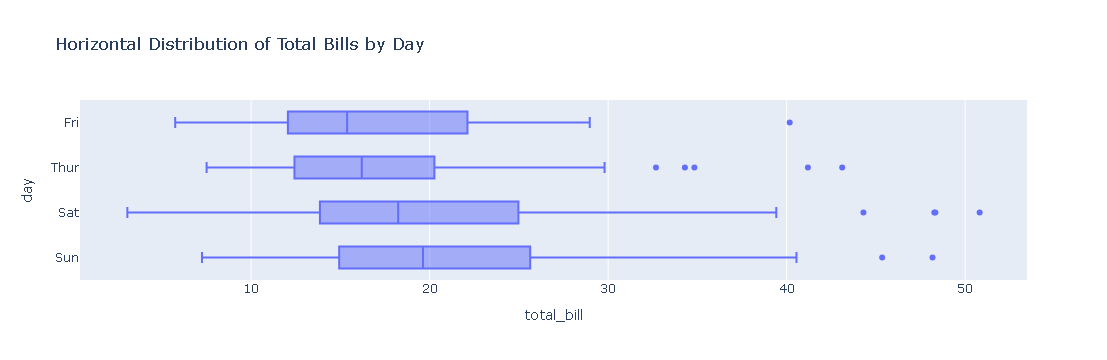

In [40]:
fig = px.box(
    tips, 
    x='total_bill', 
    y='day', 
    orientation='h',
    title='Horizontal Distribution of Total Bills by Day'
)
fig.show()

### Heatmap

In [44]:
flights = sns.load_dataset("flights")
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [47]:
flights_heatmap = flights.pivot_table(
    index='month', 
    columns='year', 
    values='passengers'
)

In [48]:
flights_heatmap

year    1949   1950   1951   1952   1953   1954   1955   1956   1957   1958  \
month                                                                         
Jan    112.0  115.0  145.0  171.0  196.0  204.0  242.0  284.0  315.0  340.0   
Feb    118.0  126.0  150.0  180.0  196.0  188.0  233.0  277.0  301.0  318.0   
Mar    132.0  141.0  178.0  193.0  236.0  235.0  267.0  317.0  356.0  362.0   
Apr    129.0  135.0  163.0  181.0  235.0  227.0  269.0  313.0  348.0  348.0   
May    121.0  125.0  172.0  183.0  229.0  234.0  270.0  318.0  355.0  363.0   
Jun    135.0  149.0  178.0  218.0  243.0  264.0  315.0  374.0  422.0  435.0   
Jul    148.0  170.0  199.0  230.0  264.0  302.0  364.0  413.0  465.0  491.0   
Aug    148.0  170.0  199.0  242.0  272.0  293.0  347.0  405.0  467.0  505.0   
Sep    136.0  158.0  184.0  209.0  237.0  259.0  312.0  355.0  404.0  404.0   
Oct    119.0  133.0  162.0  191.0  211.0  229.0  274.0  306.0  347.0  359.0   
Nov    104.0  114.0  146.0  172.0  180.0  203.0  237.0  271.0  305.0  310.0   
Dec    118.0  140.0  166.0  194.0  201.0  229.0  278.0  306.0  336.0  337.0   

year    1959   1960  
month                
Jan    360.0  417.0  
Feb    342.0  391.0  
Mar    406.0  419.0  
Apr    396.0  461.0  
May    420.0  472.0  
Jun    472.0  535.0  
Jul    548.0  622.0  
Aug    559.0  606.0  
Sep    463.0  508.0  
Oct    407.0  461.0  
Nov    362.0  390.0  
Dec    405.0  432.0

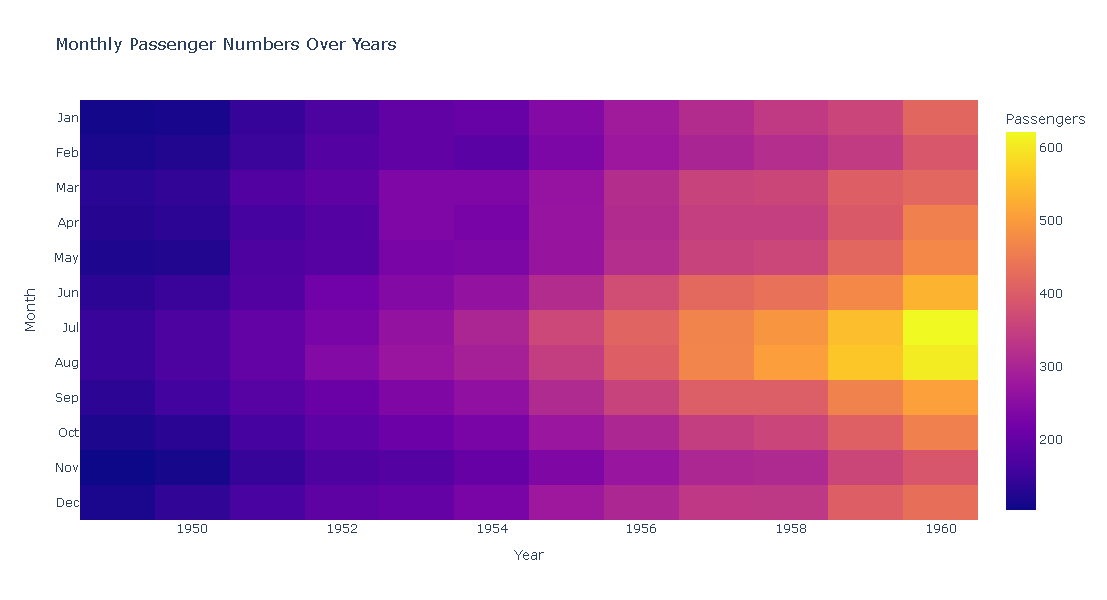

In [51]:
fig = px.imshow(
    flights_heatmap,
    labels=dict(x="Year", y="Month", color="Passengers"),
    title='Monthly Passenger Numbers Over Years'
)

fig.update_layout(width=600, height=600)

fig.show()

Дополнительные параметры

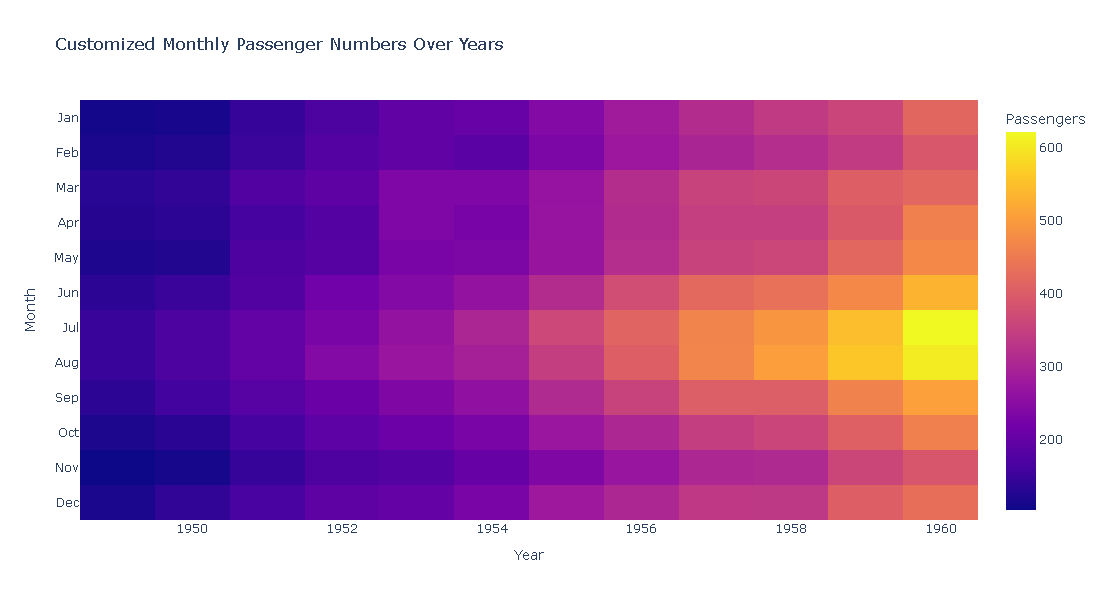

In [61]:
fig = px.imshow(
    flights_heatmap,
    labels=dict(x="Year", y="Month", color="Passengers"),
    title='Customized Monthly Passenger Numbers Over Years',
#    color_continuous_scale='Viridis', # Изменяет цветовую шкалу
#    text_auto=True
) # Добавляет аннотации

fig.update_layout(width=600, height=600)

fig.show()

### Практическое задание 1
1. Подгрузите данные по ценам компаний за 2023-й год: 'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'BABA', 'SONY'
2. Оставьте во всех датасетах только цену закрытия. Переименуйте цену закрытия так чтобы в ней отражалось имя компании
3. Сджойните датасеты в 1
4. Посчитайте корреляции между ценами компаний. Составьте heat map
5. Предположите, почему результаты получились именно такими.
6. Создайте в изначальных датасетах колонки с названиями компаний. Объедините датасеты в 1 так, чтобы там было 2 колонки (цена акции в момент закрытия и название компании)
7. Составьте график с боксплотами для цен акций

### Sunburst charts

In [62]:
tips = px.data.tips()
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

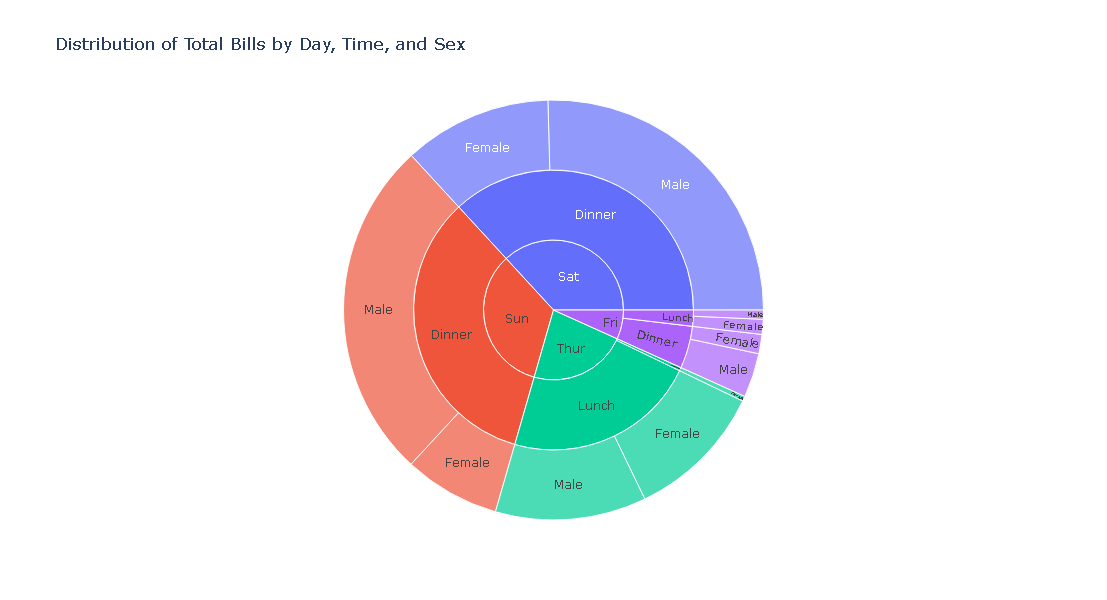

In [67]:
fig = px.sunburst(
    tips, 
    path=['day', 'time', 'sex'], 
    values='total_bill',
    title='Distribution of Total Bills by Day, Time, and Sex'
)

fig.update_layout(width=600, height=600)

fig.show()

Дополнительные параметры

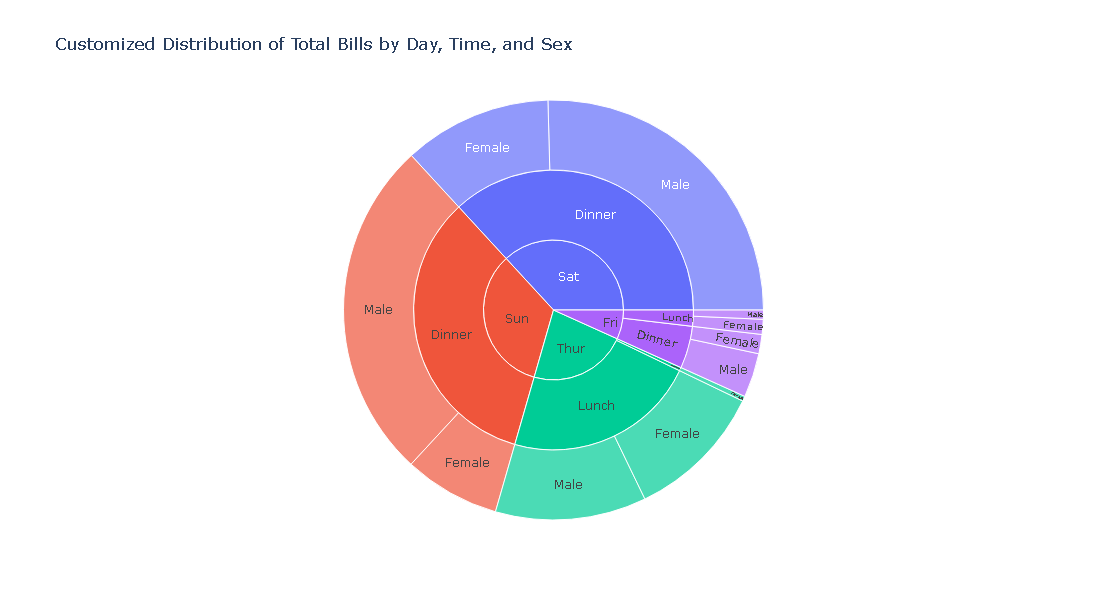

In [72]:
fig = px.sunburst(
    tips, 
    path=['day', 'time', 'sex'], 
    values='total_bill',
#    color='total_bill',  # Теперь раскраска по общей сумме счета
#    color_continuous_scale='Blues',   # Изменяет цветовую шкалу
    title='Customized Distribution of Total Bills by Day, Time, and Sex'
)

#fig.update_traces(textinfo='label+percent entry')  # Показывает метки и процент на каждом уровне

fig.update_layout(width=600, height=600)

fig.show()

### Настройка графиков в Plotly

Создадим базовую диаграмму

In [73]:
iris = px.data.iris()
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

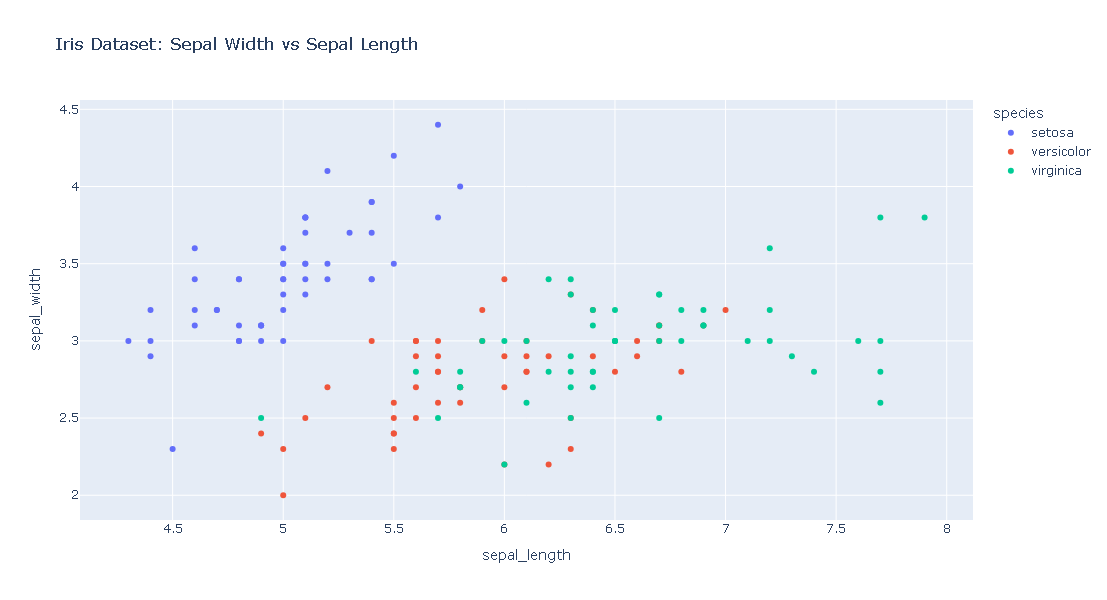

In [84]:
fig = px.scatter(
    iris, 
    x='sepal_length', 
    y='sepal_width', 
    color='species', 
    title='Iris Dataset: Sepal Width vs Sepal Length'
)

fig.update_layout(width=800, height=600)

fig.show()

Заголовки и метки осей

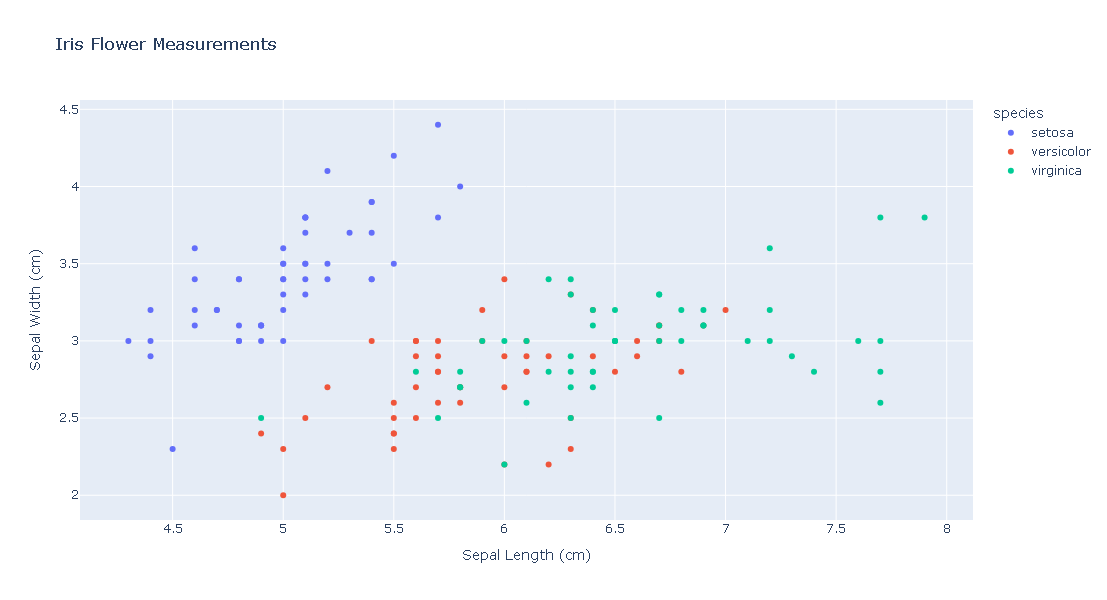

In [85]:
fig.update_layout(
    title='Iris Flower Measurements',
    xaxis_title='Sepal Length (cm)',
    yaxis_title='Sepal Width (cm)'
)
fig.show()

Редактирование легенды

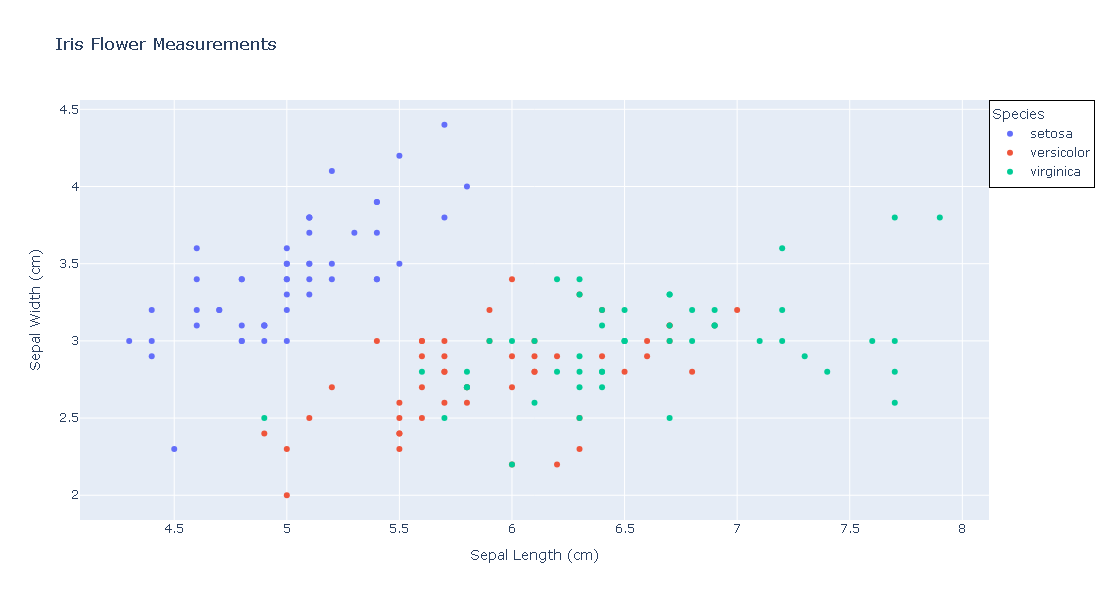

In [86]:
fig.update_layout(
    legend_title='Species',
    legend=dict(
        x=1,  # Положение легенды по горизонтали (1 - крайний справа)
        y=1,  # Положение легенды по вертикали (1 - верхняя)
        bordercolor='Black',
        borderwidth=1
    )
)
fig.show()

Аннотации

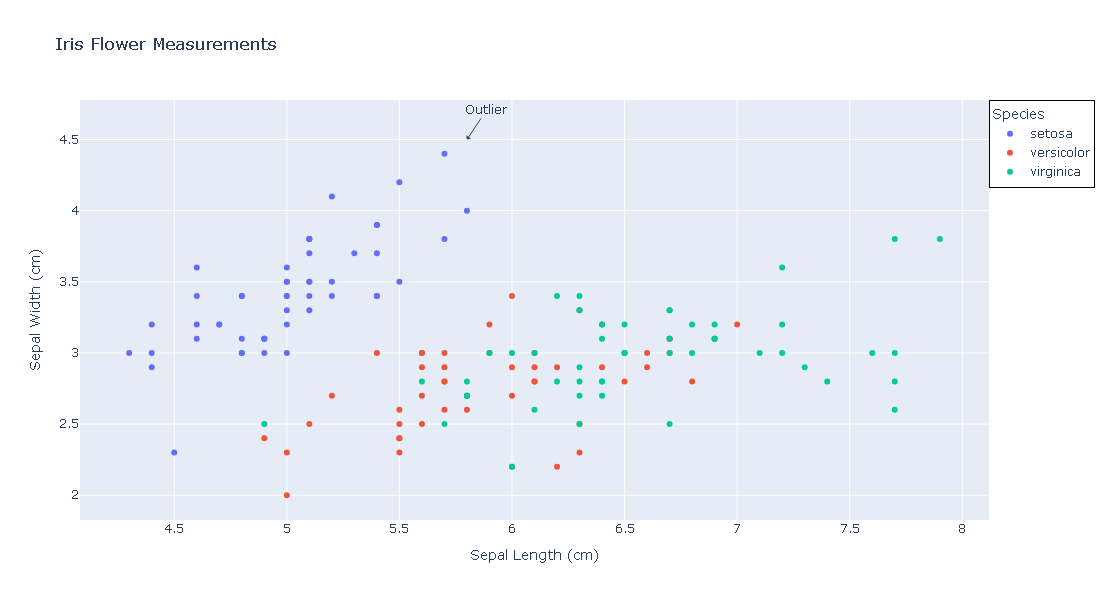

In [87]:
fig.add_annotation(
    x=5.8, 
    y=4.5,
    text="Outlier",
    showarrow=True,
    arrowhead=1,
    ax=20, # Положение хвоста стрелки (сдвиг по оси x)
    ay=-30  # Положение хвоста стрелки (сдвиг по оси y)
)
fig.show()

Дополнительные параметры

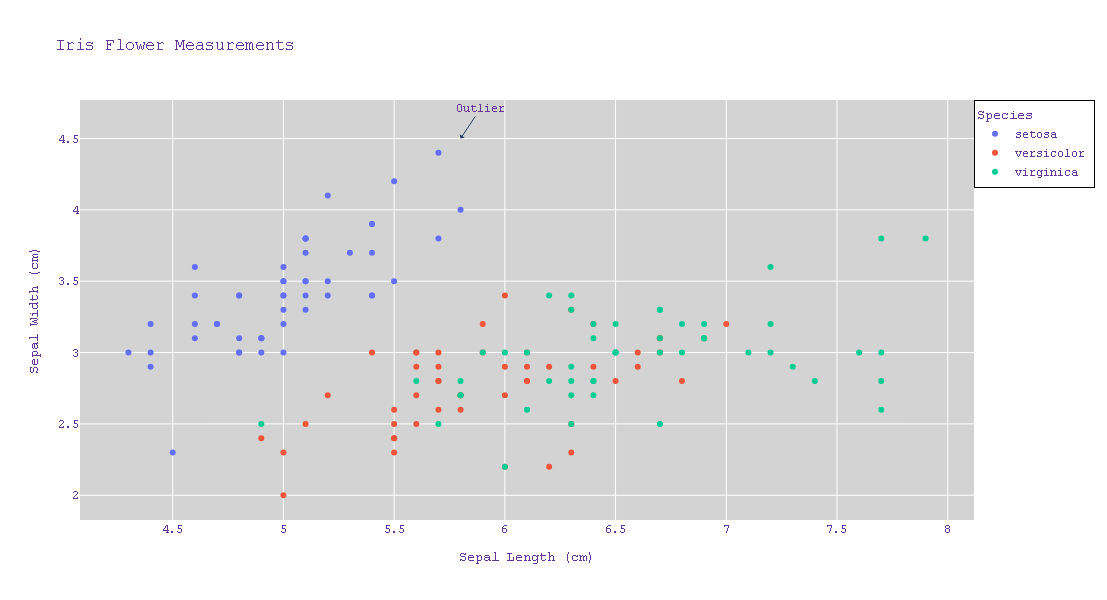

In [91]:
fig.update_layout(
    plot_bgcolor='lightgrey',  # Цвет фона области построения
    paper_bgcolor='white',     # Цвет фона за пределами области построения
    font=dict(
         family="Courier New, monospace",
         size=12,
         color="RebeccaPurple"
     )
)
fig.show()

### Практическое задание 2
1. Подгрузите данные по макроэкономической статистике (gapminder)
2. Определите максимальный и минимальный год в датасете
3. Создайте оценку ВВП страны на основе имеющихся данных
4. Создайте еще 2 датасета - один с фильтром по минимальному году, другой по максимальному
5. Составьте лучевую диаграмму по минимальному году. В качестве численной переменной возьмите оценку ВВП из предыдущего пункта. В качестве пути установиет страну и Часть света
6. Повторите пункт 5 по данным с максимальным годом. Сравните результаты

### Разбор ДЗ №9

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Загрузите датасет titanic из библиотеки seaborn, определите столбцы с пустыми значениями и заполните их любым из возможных методов.

In [2]:
df = sns.load_dataset("titanic")
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df['age'] = df['age'].fillna(df['age'].mean())
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [6]:
df['deck'] = df['deck'].fillna(method='bfill')
df.head()

/var/folders/t4/k1zqy_252832shmd93xtl6hr0000gn/T/ipykernel_29787/1396034183.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['deck'] = df['deck'].fillna(method='bfill')


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True    C  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False    C  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True    E  Southampton    no   True

In [7]:
df['embarked'] = df['embarked'].fillna(value = df['embarked'].mode()[0])
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True    C  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False    C  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True    E  Southampton    no   True

In [8]:
df['embark_town'] = df['embark_town'].fillna(value = df['embark_town'].mode()[0])
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True    C  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False    C  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True    E  Southampton    no   True

In [9]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           1
embark_town    0
alive          0
alone          0
dtype: int64

2. Загрузите датасет titanic из библиотеки seaborn, определите категориальную переменную и закодируйте её.

In [10]:
df['Encoded category'] = pd.factorize(df['class'])[0]
df

survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  \
0     Third    man        True    C  Southampton    no  False   
1     First  woman       False    C    Cherbourg   yes  False   
2     Third  woman       False    C  Southampton   yes   True   
3     First  woman       False    C  Southampton   yes  False   
4     Third    man        True    E  Southampton    no   True   
..      ...    ...         ...  ...          ...   ...    ...   
886  Second    man        True    B  Southampton    no   True   
887   First  woman       False    B  Southampton   yes   True   
888   Third  woman       False    C  Southampton    no  False   
889   First    man        True    C    Cherbourg   yes   True   
890   Third    man        True  NaN   Queenstown    no   True   

     Encoded category  
0                   0  
1                   1  
2                   0  
3                   1  
4                   0  
..                ...  
886                 2  
887                 1  
888                 0  
889                 1  
890                 0  

[891 rows x 16 columns]

In [92]:
gapminder = px.data.gapminder()

In [94]:
gapminder[
    gapminder['year'] == 1952
]

country continent  year  lifeExp       pop    gdpPercap  \
0            Afghanistan      Asia  1952   28.801   8425333   779.445314   
12               Albania    Europe  1952   55.230   1282697  1601.056136   
24               Algeria    Africa  1952   43.077   9279525  2449.008185   
36                Angola    Africa  1952   30.015   4232095  3520.610273   
48             Argentina  Americas  1952   62.485  17876956  5911.315053   
...                  ...       ...   ...      ...       ...          ...   
1644             Vietnam      Asia  1952   40.412  26246839   605.066492   
1656  West Bank and Gaza      Asia  1952   43.160   1030585  1515.592329   
1668         Yemen, Rep.      Asia  1952   32.548   4963829   781.717576   
1680              Zambia    Africa  1952   42.038   2672000  1147.388831   
1692            Zimbabwe    Africa  1952   48.451   3080907   406.884115   

     iso_alpha  iso_num  
0          AFG        4  
12         ALB        8  
24         DZA       12  
36         AGO       24  
48         ARG       32  
...        ...      ...  
1644       VNM      704  
1656       PSE      275  
1668       YEM      887  
1680       ZMB      894  
1692       ZWE      716  

[142 rows x 8 columns]

### Разбор ДЗ №10

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

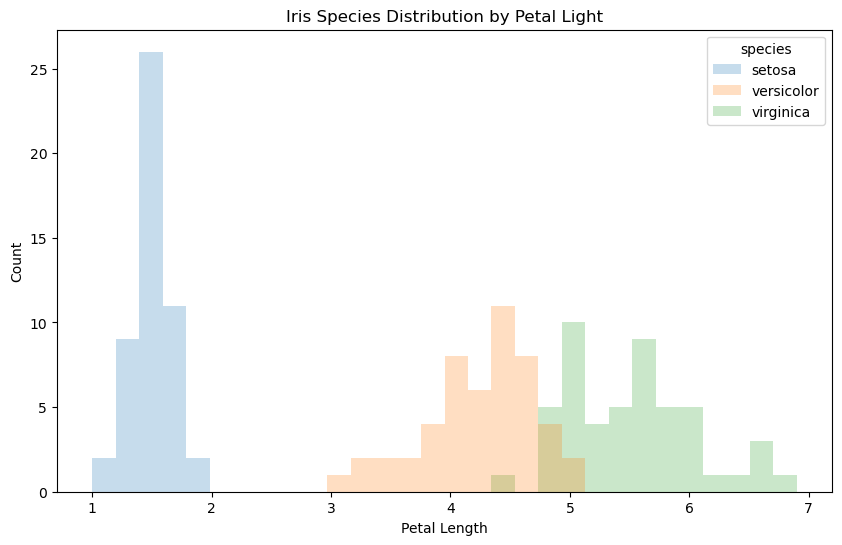

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=iris, x="petal_length", hue="species", element="step", bins=30,  edgecolor=None)
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.title('Iris Species Distribution by Petal Light')
plt.show()

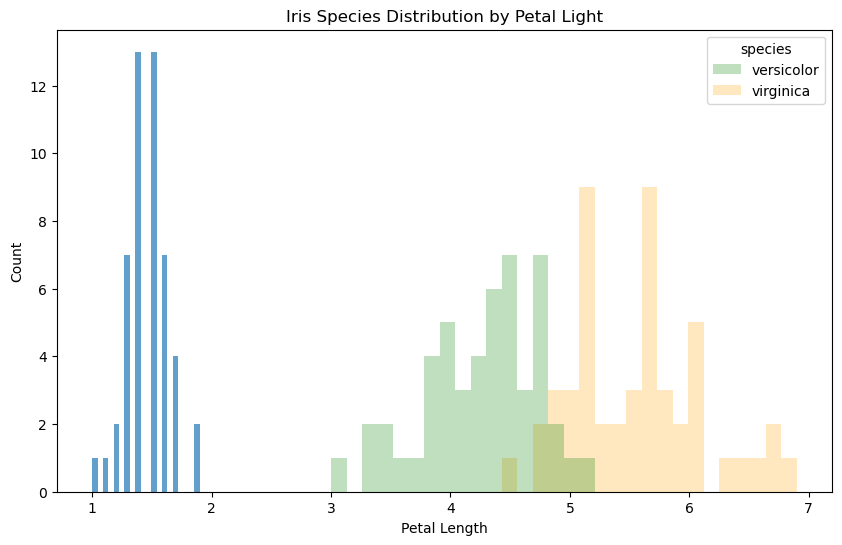

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=iris[iris['species'] == 'setosa'], x="petal_length", hue="species", bins=20, alpha=0.7, element="step", edgecolor=None, palette=['#1f77b4'])
sns.histplot(data=iris[iris['species'] != 'setosa'], x="petal_length", hue="species", element="step", bins=30,  edgecolor=None, palette=['green', 'orange'])
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.title('Iris Species Distribution by Petal Light')
plt.show()

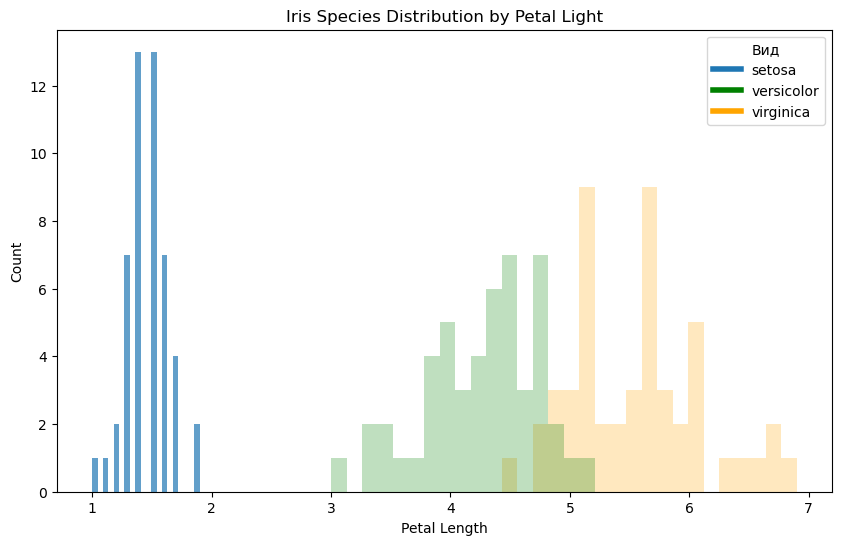

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


plt.figure(figsize=(10, 6))
sns.histplot(data=iris[iris['species'] == 'setosa'], x="petal_length", hue="species", bins=20, alpha=0.7, element="step", edgecolor=None, palette=['#1f77b4'])
sns.histplot(data=iris[iris['species'] != 'setosa'], x="petal_length", hue="species", element="step", bins=30,  edgecolor=None, palette=['green', 'orange'])
plt.xlabel('Petal Length')
plt.ylabel('Count')


custom_lines = [
    Line2D([0], [0], color='#1f77b4', lw=4),
    Line2D([0], [0], color='green', lw=4),
    Line2D([0], [0], color='orange', lw=4)
]

plt.legend(custom_lines, ['setosa', 'versicolor', 'virginica'], title='Вид')

plt.title('Iris Species Distribution by Petal Light')
plt.show()